In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Logistic Regression
构建一个可以基于两次考试分数来评估录取可能性的分类模型

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam_1', 'Exam_2', 'Admitted'])
data.head()

,Exam_1,Exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


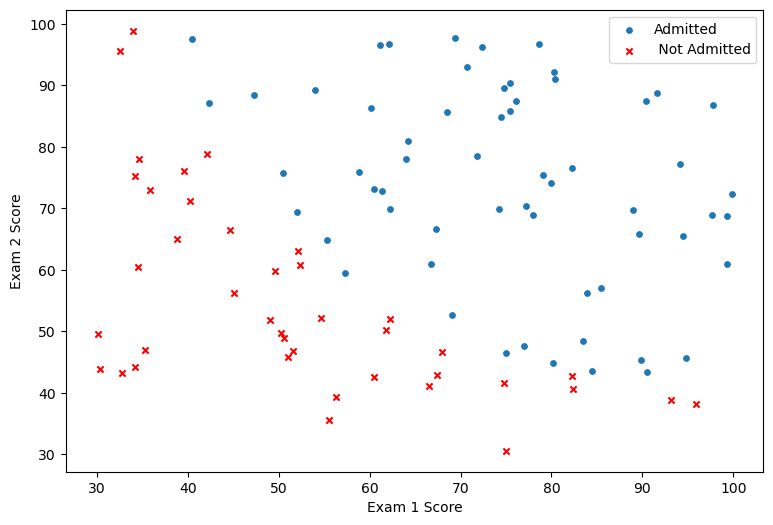

In [3]:
# 绘出原始数据
def drawData(data):
    positive = data[data['Admitted'].isin([1])]
    negtive = data[data['Admitted'].isin([0])]
    
    fig, ax = plt.subplots(figsize = (9, 6))
    ax.scatter(positive['Exam_1'], positive['Exam_2'], s = 15,  marker = 'o', label = 'Admitted')
    ax.scatter(negtive['Exam_1'], negtive['Exam_2'], s = 20, c = 'r', marker = 'x', label = ' Not Admitted')
    ax.legend()
    ax.set_xlabel('Exam 1 Score')
    ax.set_ylabel('Exam 2 Score')
    
    return ax
    
drawData(data)
plt.show()

### sigmoid function:  
<img src="g.jpg" width="150"/>

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

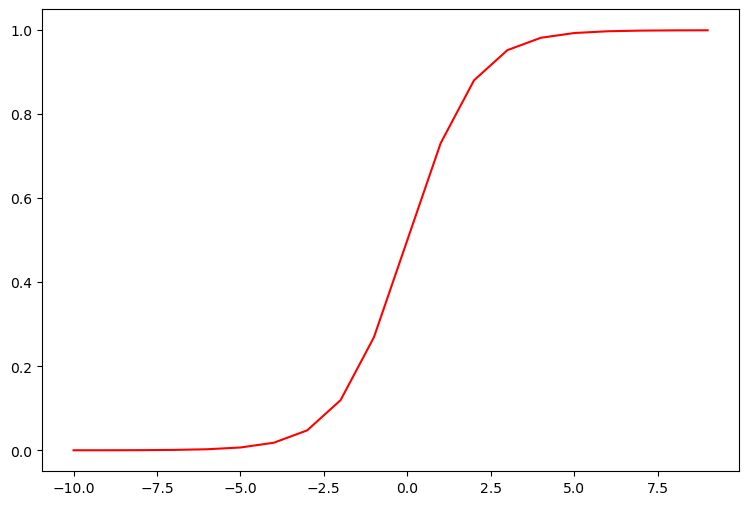

In [5]:
# 验证sigmoid函数能否正确工作
nums = np.arange(-10, 10)

fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

### 代价函数Cost Function：
<img src="cost.jpg" alt="Drawing" width="500" >
<img src="h.jpg" alt="Drawing" width="150" >

In [6]:
def computeCost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)   
    h = sigmoid(X * theta.T)
#     print(X.shape)
#     print(theta.shape)
#     print(y.shape)
#     print(h.shape)
    first = np.multiply(-y, np.log(h))
    second = np.multiply((1- y), np.log(1 - h))
#     J = np.sum(first - second) / len(X) # 1
    J = np.mean(first - second) # 2
    return J

In [7]:
# 验证cost函数
data.insert(0, 'x0', 1)

cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1 : cols]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [8]:
computeCost(theta, X, y)

0.6931471805599453

### gradient
+ 计算gradient的公式：
<img src="gradient.jpg" width="300">
+ gradient descent：
<img src="gd.jpg" width="400">

In [9]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    para_nums = np.size(theta)
    h = sigmoid(X * theta.T)
    error = h - y
    grad = np.zeros(para_nums)
    
    for j in range(para_nums):
        grad[j] = np.sum(np.multiply(error, X[:, j]))/len(X)
    
    return grad

In [10]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [11]:
# 使用SciPy's truncated newton(TNC)实现寻找最优参数
import scipy.optimize as opt

result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131856,   0.20623159,   0.20147149]), 36, 0)

In [12]:
computeCost(result[0], X, y)

0.20349770158947486

### 决策边界：
+ $\theta_0 + \theta_1x_1+ \theta_1x_2 = 0$ 

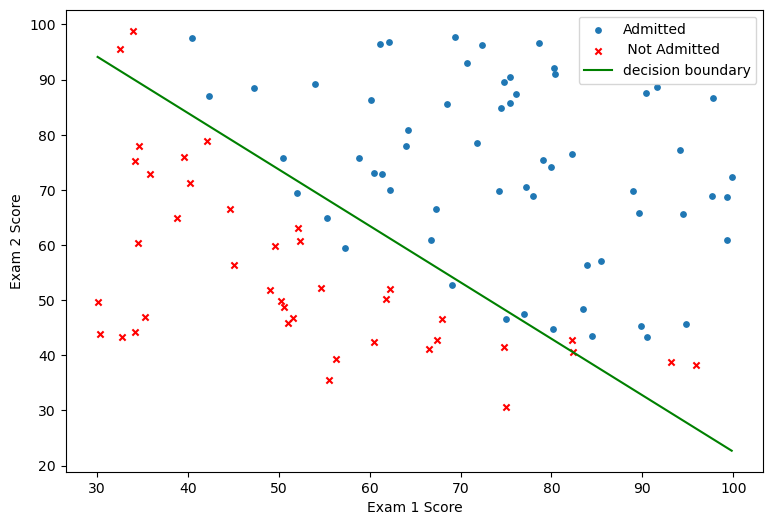

In [13]:
# 画出决策边界 
ax = drawData(data)
x1 = np.linspace(data.Exam_1.min(), data.Exam_1.max(), 100)
x2 = -(result[0][0] + result[0][1]*x1)/ result[0][2]
ax.plot(x1, x2, 'g', label = "decision boundary")
ax.legend()
plt.show()

学习参数后，可以使用该模型来预测特定的学生是否将被录取。  
逻辑回归模型的假设函数:  
$$ {h}_{\theta}(x) = g(\theta^TX) $$
Sigmoid Function: 
$$ g(z) = \frac{1}{1 + e^{-z}} $$
当${h}_{\theta} >= 0.5$, 预测 $y = 1$  
当${h}_{\theta} < 0.5$, 预测 $y = 0$  

In [14]:
def predict(theta, X):
    h = sigmoid(X * theta.T)
#     print(h)
    return [1 if x >= 0.5 else 0 for x in h]

In [15]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

# theta_min = np.matrix(result[0])
# predictions = predict(theta_min, np.array([[1, 45, 85]]))
# print(predictions)

accuracy = 89%


In [16]:
from sklearn.metrics import classification_report

print(classification_report(predict(theta_min, X), y))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.90      0.91        61

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100



## Regularized logistic regression(正规化逻辑回归）
根据芯片过去的两次测试数据集，构建一个逻辑回归模型，决定芯片是被接受或抛弃

In [17]:
path2 = 'ex2data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Test_1', 'Test_2', 'Accepted'])
data2.head()

,Test_1,Test_2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


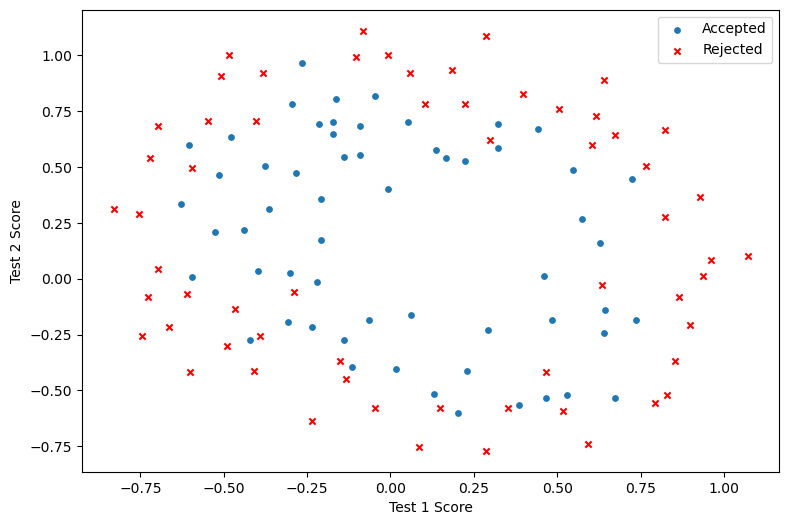

In [18]:
# 绘出原始数据
def drawData2(data):
    positive = data[data['Accepted'].isin([1])]
    negtive = data[data['Accepted'].isin([0])]
    
    fig, ax = plt.subplots(figsize = (9, 6))
    ax.scatter(positive['Test_1'], positive['Test_2'], s = 15,  marker = 'o', label = 'Accepted')
    ax.scatter(negtive['Test_1'], negtive['Test_2'], s = 20, c = 'r', marker = 'x', label = 'Rejected')
    ax.legend()
    ax.set_xlabel('Test 1 Score')
    ax.set_ylabel('Test 2 Score')
    
    return ax
    
drawData2(data2)
plt.show()

### Feature mapping(特征映射)
把特征映射到$x_1$和$x_2$组成的所有多项式，直到达到6次方

In [19]:
def featureMap(x1, x2, power):
    data = {}
    for i in range(power + 1):
        for j in range(i + 1):
            data["f{}{}".format(i - j, j)] = np.power(x1, i - j) * np.power(x2, j)
    return pd.DataFrame(data)

x1 = data2['Test_1'].values
x2 = data2['Test_2'].values
power = 6

mappingData = featureMap(x1, x2, power)
mappingData.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


### Cost function and gradient
+ cost function:
<img src = "Rcost.jpg" width = 500>
不需要正则化$\theta_0$
+ gradient:
<img src = "Rgradient.jpg" width = 370>

In [20]:
def costReg(theta, X, y, Lambda):
    cost = computeCost(theta, X, y)
    X = np.matrix(X)
    theta = np.matrix(theta)
    reg = (Lambda / (2 * len(X))) * np.sum(np.power(theta[1:], 2))
    return cost + reg

In [21]:
# 验证costReg函数, 像第一部分一样,但是需要使用经过特征映射后的特征数据
X2 = mappingData.values
# y2 = data2.Accepted.values # shape 为（1， 118），computeCost只能使用2，用1算出来是错误的

cols = data2.shape[1]
y2 = data2.iloc[:, cols - 1:cols] # shape 为（118， 1），computeCost使用1和2都可以

theta2 = np.zeros(X2.shape[1])

In [22]:
Lambda = 1
costReg(theta2, X2, y2, Lambda)

0.6931471805599454

In [23]:
def gradientReg(theta, X, y, Lambda):
    grad = gradient(theta, X, y)
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    
    for j in range(1, np.size(theta)):
        grad[j] = grad[j] + (Lambda / len(X)) * theta[:, j]
    
    return grad

In [24]:
gradientReg(theta2, X2, y2, Lambda)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [25]:
# 使用SciPy's truncated newton(TNC)实现寻找最优参数
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, Lambda))
result2

(array([ 1.27422017,  0.62478646,  1.1859038 , -2.02173838, -0.91708239,
        -1.41319138,  0.12444374, -0.36770519, -0.3645818 , -0.18067782,
        -1.46506509, -0.06288697, -0.61999792, -0.27174434, -1.20129288,
        -0.23663768, -0.20901442, -0.05490415, -0.27804408, -0.29276912,
        -0.46790799, -1.04396478,  0.02082842, -0.29638538,  0.00961556,
        -0.32917183, -0.13804211, -0.93550838]),
 57,
 4)

### 预测分析

In [26]:
theta_min2 = np.matrix(result2[0])
print(classification_report(predict(theta_min2, X2), y2))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        50
           1       0.91      0.78      0.84        68

    accuracy                           0.83       118
   macro avg       0.83      0.84      0.83       118
weighted avg       0.84      0.83      0.83       118



### 决策边界:
+ $\theta^Tx = 0$
+ [如何绘制非线性决策边界](https://www.zhihu.com/question/346674029#:~:text=%E9%A6%96%E5%85%88%E6%98%AF%E6%95%B0%E6%8D%AE%E7%82%B9%E7%9A%84%E7%94%9F%E6%88%90%E3%80%82%20%E6%88%91%E4%BB%AC%E4%BD%BF%E7%94%A8%20make_gaussian%20%E7%94%9F%E6%88%90%E9%9D%9E%E7%BA%BF%E6%80%A7%E7%9A%84%E6%95%B0%E6%8D%AE%EF%BC%8C%E5%85%B6%E4%B8%AD%E6%AD%A3%E6%A0%B7%E6%9C%AC%E4%BD%BF%E7%94%A8%E8%93%9D%E8%89%B2%E5%9C%86%E5%9C%88%E6%A0%87%E8%AE%B0%EF%BC%8C%E8%B4%9F%E6%A0%B7%E6%9C%AC%E4%BD%BF%E7%94%A8%E7%BA%A2%E8%89%B2%E5%8F%89%E5%AD%90%E6%A0%87%E8%AE%B0%E3%80%82%20%E7%84%B6%E5%90%8E%E4%BD%BF%E7%94%A8logistic_train%E5%87%BD%E6%95%B0%EF%BC%8C%E8%AE%AD%E7%BB%83%E9%9D%9E%E7%BA%BF%E6%80%A7%E7%9A%84%E5%88%86%E7%B1%BB%E6%A8%A1%E5%9E%8B%E3%80%82,%E8%AE%AD%E7%BB%83%E5%90%8E%E4%BC%9A%E5%BE%97%E5%88%B0%20%E5%8F%82%E6%95%B0%E5%88%97%E8%A1%A8%20theta%EF%BC%8C%E8%BF%99%E4%B8%AAtheta%E5%88%97%E8%A1%A8%EF%BC%8C%E5%AE%9E%E9%99%85%E4%B8%8A%E5%B0%B1%E5%AF%B9%E5%BA%94%E7%BB%BF%E8%89%B2%E7%9A%84%E5%86%B3%E7%AD%96%E8%BE%B9%E7%95%8C%E3%80%82%20%E6%8E%A5%E7%9D%80%E8%B0%83%E7%94%A8draw_decision_boundary%EF%BC%8C%E7%BB%98%E5%88%B6%20theta%20%E5%AF%B9%E5%BA%94%E7%9A%84%E9%9D%9E%E7%BA%BF%E6%80%A7%E5%86%B3%E7%AD%96%E8%BE%B9%E7%95%8C%E3%80%82)

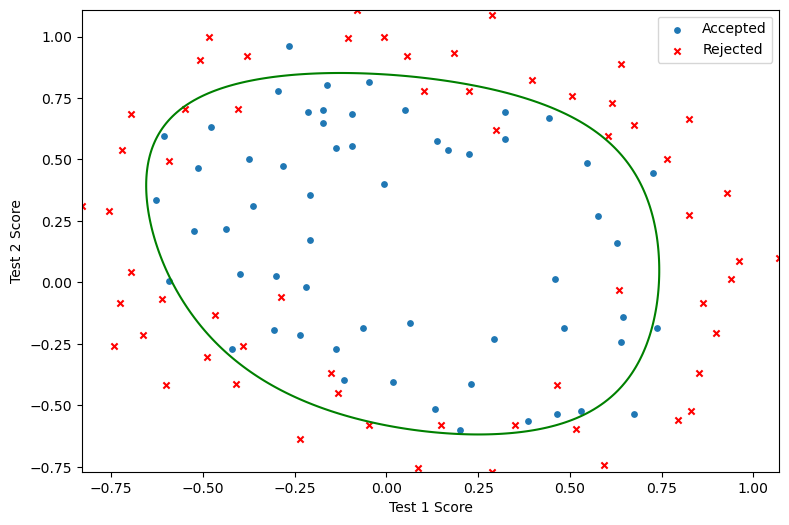

In [27]:
# x = np.linspace(data2.Test_1.min(), data2.Test_1.max(), 200)
# x1, x2 = np.meshgrid(x, x)

min_x1 = data2.Test_1.min()
max_x1 = data2.Test_1.max()
min_x2 = data2.Test_2.min()
max_x2 = data2.Test_2.max()
x1, x2 = np.meshgrid(np.linspace(min_x1, max_x1, 200),
                     np.linspace(min_x2, max_x2, 200))

z = featureMap(x1.ravel(), x2.ravel(), power).values
z = z * theta_min2.T
z = z.reshape(x1.shape)
ax = drawData2(data2)
ax.contour(x1, x2, z, 0, colors = "g")
plt.show()

没有正则化，$\lambda = 0$（过拟合）

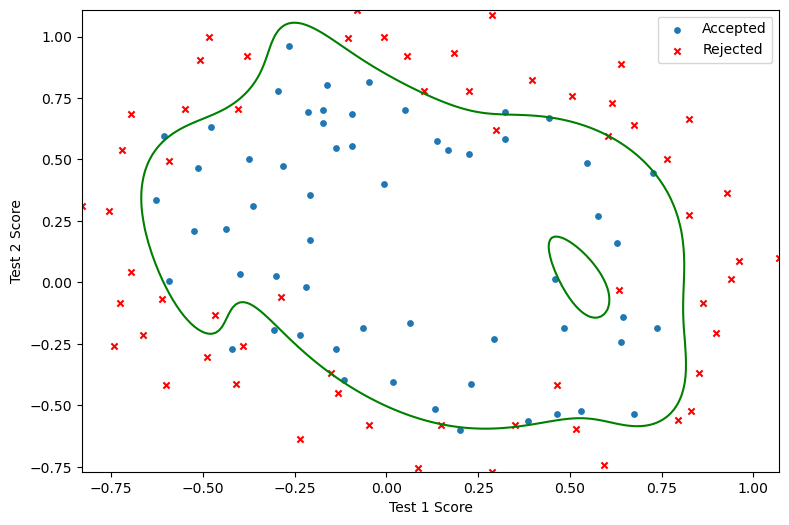

In [28]:
Lambda = 0
result3 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, Lambda))
theta_min3 = np.matrix(result3[0])
z1 = featureMap(x1.ravel(), x2.ravel(), power).values
z1 = z1 * theta_min3.T
z1 = z1.reshape(x1.shape)
ax = drawData2(data2)
ax.contour(x1, x2, z1, 0, colors = "g")
plt.show()

正则化过多，$\lambda$ 太大
（欠拟合）

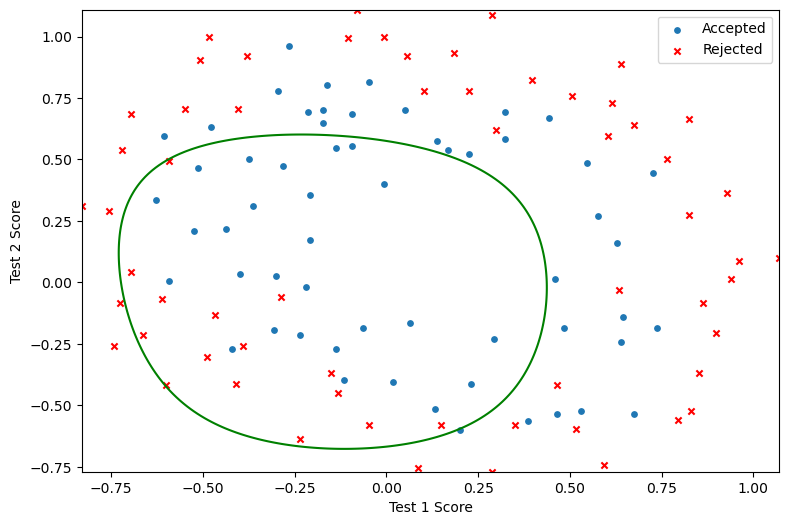

In [29]:
Lambda = 100
result4 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, Lambda))
theta_min4 = np.matrix(result4[0])
z2 = featureMap(x1.ravel(), x2.ravel(), power).values
z2 = z2 * theta_min4.T
z2 = z2.reshape(x1.shape)
ax = drawData2(data2)
ax.contour(x1, x2, z2, 0, colors = "g")
plt.show()